In [1]:
!pip install -q kaggle

# Standard imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Nigerian E-Commerce Dataset.xlsx to Nigerian E-Commerce Dataset.xlsx


In [3]:
import os
os.listdir()


['.config', 'Nigerian E-Commerce Dataset.xlsx', 'sample_data']

In [4]:
import pandas as pd

# Load Excel file (use sheet_name=None to inspect available sheets if needed)
df = pd.read_excel('Nigerian E-Commerce Dataset.xlsx')

# Show first 10 rows
display(df.head(10))

# Show dataset info
print(df.info())


,Order ID,Branch Location,Branch Name,Business Name,Is Deleted,Item ID,Item Name,Item Price,Order Item Number,Item Status,Packed Quantity,Quantity,Total Price,Order Date,Order Region,Order Local Area
0,4672,Lagos,Generic Store,Generic Stores,False,60a7b0242498ec1dd380508c,Golden Penny Spaghetti - 500g,4950.00,MLPLOCN1FAHUIYK50S0W9YUQ,Cancelled,1,1,4950.00,2021-05-31,Lagos,Ifako-Ijaye
1,4672,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML1DN3SZT8R02DKKNKBLXDXA,Cancelled,2,2,6785.50,2021-05-31,Lagos,Ifako-Ijaye
2,4671,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML2UMJU6I2P0O958PKZ9AMDQ,Cancelled,1,1,3392.75,2021-05-31,Lagos,Ifako-Ijaye
3,4670,Lagos,TDILIFE,TDILIFE,False,608045d069c51b4e80e70343,HOLLANDIA EVAP MILK FULL CREAM 60g X 48,3370.00,MLDFDZKVPFV0SHDGGA2KFNRG,Delivered,1,1,3370.00,2021-05-31,Lagos,Ifako-Ijaye
4,4670,Lagos,TDILIFE,TDILIFE,False,608042a469c51b4e80e702f7,HOLLANDIA EVAP MILK FULL CREAM 190g X 24,4845.00,MLFLBFFM0O5UAS0MROFAL0QA,Cancelled,1,1,4845.00,2021-05-31,Lagos,Ifako-Ijaye
5,4670,Lagos,TDILIFE,TDILIFE,False,608043c969c51b4e80e70314,HOLLANDIA EVAP MILK FULL CREAM 120g X 24,2760.00,ML39SRTWZAW0QRQZCVEUBCGW,Delivered,1,1,2760.00,2021-05-31,Lagos,Ifako-Ijaye
6,4669,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML2O0EB2MZNKSXAPFEKGG0JW,Cancelled,2,2,6785.50,2021-05-31,Lagos,Ifako-Ijaye
7,4669,Lagos,Generic Store,Generic Stores,False,60a7b0242498ec1dd380508c,Golden Penny Spaghetti - 500g,4950.00,MLJG03AA1NG0Y1EZBKFH88SG,Cancelled,1,1,4950.00,2021-05-31,Lagos,Alimosho
8,4668,Lagos,TDILIFE,TDILIFE,False,60b0cef62498ec1dd3805329,CHIVITA HAPPY HOUR - 150MLX24,1076.25,ML03X81AHZV026P0L0BCTSLW,Cancelled,1,1,1076.25,2021-05-31,Lagos,Alimosho
9,4668,Lagos,TDILIFE,TDILIFE,False,60b4d9352498ec1dd38053b6,CHIVITA ACTIVE 1LX10,4253.75,MLL1NIQOQDTEMWTIE07D20JW,Cancelled,1,1,4253.75,2021-05-31,Lagos,Alimosho


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3928 entries, 0 to 3927
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           3928 non-null   int64         
 1   Branch Location    3928 non-null   object        
 2   Branch Name        3928 non-null   object        
 3   Business Name      3928 non-null   object        
 4   Is Deleted         3928 non-null   bool          
 5   Item ID            3928 non-null   object        
 6   Item Name          3928 non-null   object        
 7   Item Price         3928 non-null   float64       
 8   Order Item Number  3928 non-null   object        
 9   Item Status        3928 non-null   object        
 10  Packed Quantity    3928 non-null   int64         
 11  Quantity           3928 non-null   int64         
 12  Total Price        3928 non-null   float64       
 13  Order Date         3928 non-null   datetime64[ns]
 14  Order Re

In [5]:

print("Initial shape:", df.shape)

# 1. Remove duplicates
df_before = df.shape[0]
df = df.drop_duplicates()
df_after = df.shape[0]

print(f"Duplicates removed: {df_before - df_after}")

# 2. Handle missing values
missing_before = df.isna().sum()

# Fill categorical missing with "Unknown"
df['Order Region'] = df['Order Region'].fillna("Unknown")
df['Order Local Area'] = df['Order Local Area'].fillna("Unknown")

missing_after = df.isna().sum()

print("\nMissing values BEFORE:")
print(missing_before)

print("\nMissing values AFTER:")
print(missing_after)

print("\nFinal dataset shape:", df.shape)


Initial shape: (3928, 16)
Duplicates removed: 0

Missing values BEFORE:
Order ID               0
Branch Location        0
Branch Name            0
Business Name          0
Is Deleted             0
Item ID                0
Item Name              0
Item Price             0
Order Item Number      0
Item Status            0
Packed Quantity        0
Quantity               0
Total Price            0
Order Date             0
Order Region         157
Order Local Area     872
dtype: int64

Missing values AFTER:
Order ID             0
Branch Location      0
Branch Name          0
Business Name        0
Is Deleted           0
Item ID              0
Item Name            0
Item Price           0
Order Item Number    0
Item Status          0
Packed Quantity      0
Quantity             0
Total Price          0
Order Date           0
Order Region         0
Order Local Area     0
dtype: int64

Final dataset shape: (3928, 16)


RFM table (first 10 rows):


,Business Name,recency,frequency,monetary
0,De Majok,110,37,1.926868e+07
1,Deeski Store Limited,2,508,1.197739e+08
2,Ecopeaks Limited,3,255,8.612433e+07
3,Ekulo International Limited(Wine world),11,1,9.491500e+03
4,Extreme Manufacturing Nigeria limited,36,10,8.459000e+04
5,Farmer First,1,29,1.725694e+08
6,Femadon Stores Ltd,18,9,4.099090e+05
7,Funky stores Nigeria LTD.,48,1,1.450500e+04
8,Generic Stores,1,224,6.023875e+06
9,MUL,1,271,2.589996e+06


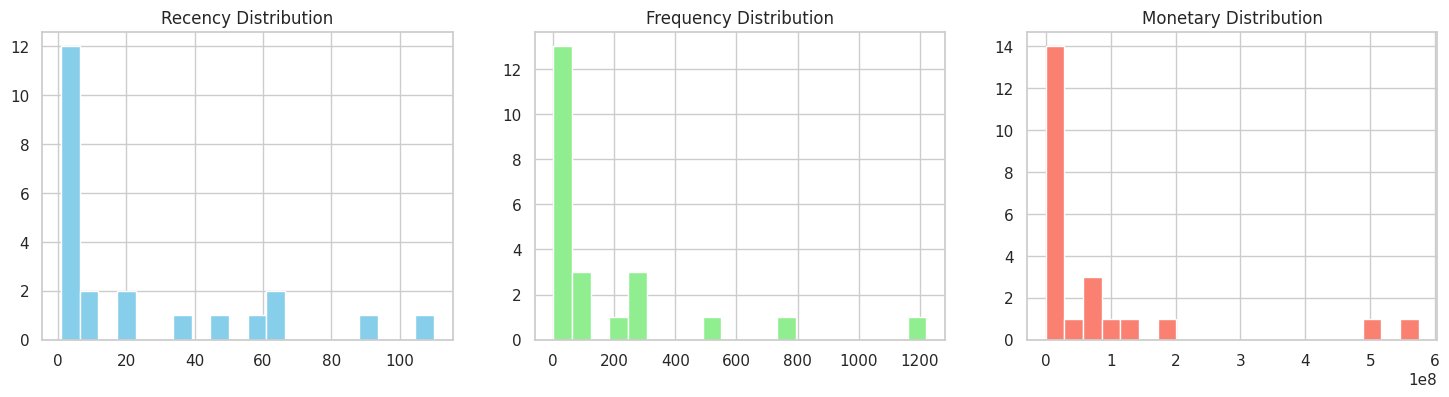

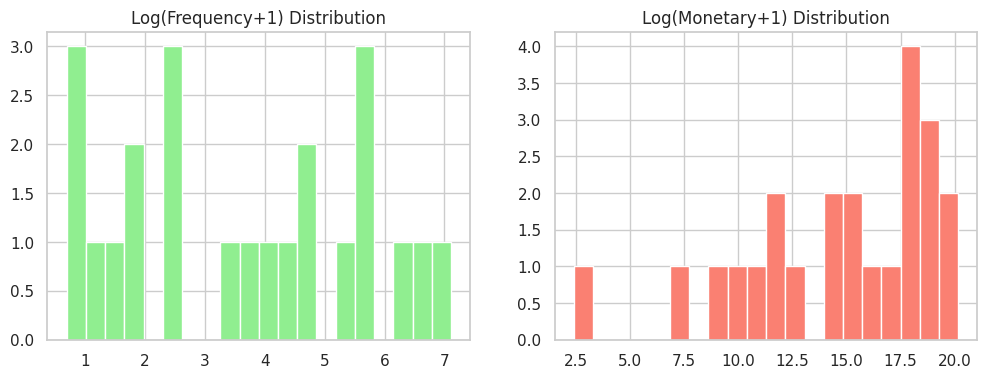

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Use 'Business Name' as customer identifier (you can change to another unique customer ID if exists)
customer_col = 'Business Name'
date_col = 'Order Date'
amount_col = 'Total Price'

# Define snapshot date as one day after last order
snapshot_date = df[date_col].max() + pd.Timedelta(days=1)

# Recency: days since last order
recency = df.groupby(customer_col)[date_col].max().apply(lambda x: (snapshot_date - x).days)

# Frequency: number of orders per customer
frequency = df.groupby(customer_col)['Order ID'].count()

# Monetary: total spending per customer
monetary = df.groupby(customer_col)[amount_col].sum()

# Combine into RFM dataframe
rfm = pd.DataFrame({
    'recency': recency,
    'frequency': frequency,
    'monetary': monetary
}).reset_index()

print("RFM table (first 10 rows):")
display(rfm.head(10))

# --- Plot distributions ---
fig, axes = plt.subplots(1,3, figsize=(18,4))
axes[0].hist(rfm['recency'], bins=20, color='skyblue')
axes[0].set_title("Recency Distribution")
axes[1].hist(rfm['frequency'], bins=20, color='lightgreen')
axes[1].set_title("Frequency Distribution")
axes[2].hist(rfm['monetary'], bins=20, color='salmon')
axes[2].set_title("Monetary Distribution")
plt.show()

# Log transform for skewed features (optional)
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(np.log1p(rfm['frequency']), bins=20, color='lightgreen')
axes[0].set_title("Log(Frequency+1) Distribution")
axes[1].hist(np.log1p(rfm['monetary']), bins=20, color='salmon')
axes[1].set_title("Log(Monetary+1) Distribution")
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
features = ['recency', 'frequency', 'monetary']

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[features])

# Convert back to DataFrame for convenience
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=features)
rfm_scaled_df['Business Name'] = rfm['Business Name']

print("Scaled features (first 10 rows):")
display(rfm_scaled_df.head(10))


Scaled features (first 10 rows):


,recency,frequency,monetary,Business Name
0,2.676622,-0.461057,-0.389743,De Majok
1,-0.688120,1.162157,0.282666,Deeski Store Limited
2,-0.656964,0.290240,0.057541,Ecopeaks Limited
3,-0.407724,-0.585124,-0.518593,Ekulo International Limited(Wine world)
4,0.371151,-0.554107,-0.518090,Extreme Manufacturing Nigeria limited
5,-0.719275,-0.488628,0.635883,Farmer First
6,-0.189639,-0.557554,-0.515914,Femadon Stores Ltd
7,0.745011,-0.585124,-0.518559,Funky stores Nigeria LTD.
8,-0.719275,0.183404,-0.478355,Generic Stores
9,-0.719275,0.345381,-0.501328,MUL


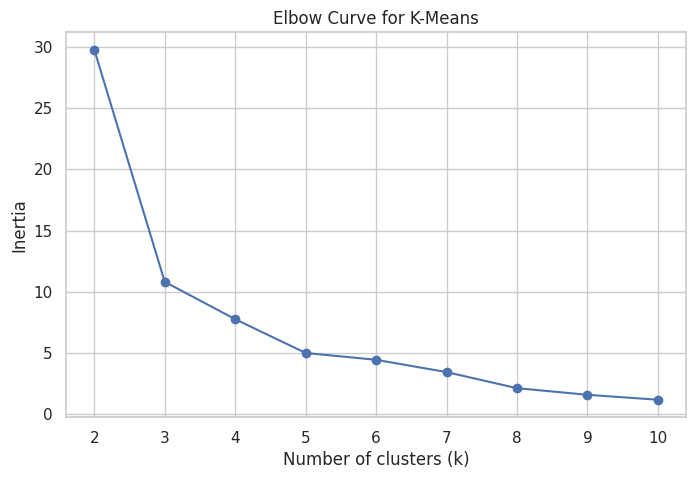

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Keep only scaled numerical features for clustering
X = rfm_scaled_df[['recency','frequency','monetary']]

inertia = []

# Run K-Means for k = 2 to 10
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(2,11), inertia, marker='o')
plt.title("Elbow Curve for K-Means")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


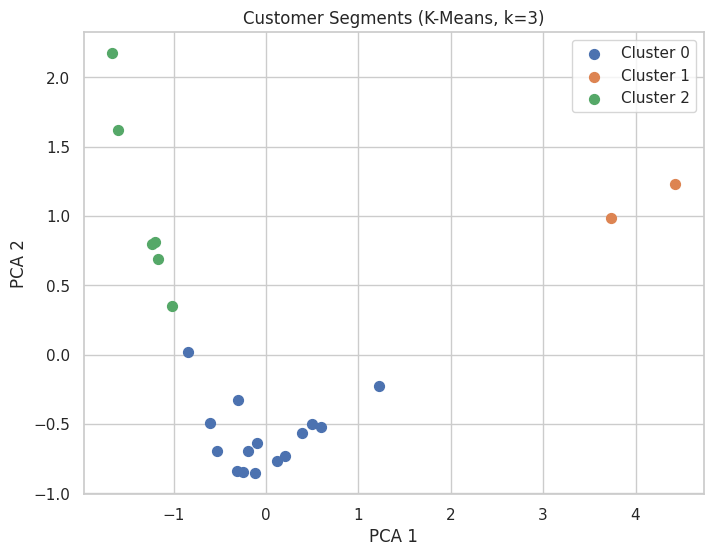

In [9]:
from sklearn.decomposition import PCA

# Fit K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_scaled_df['cluster'] = kmeans.fit_predict(X)

# Apply PCA to reduce features to 2D for plotting
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(X)
rfm_scaled_df['pca1'] = components[:,0]
rfm_scaled_df['pca2'] = components[:,1]

# Plot clusters
plt.figure(figsize=(8,6))
for c in range(3):
    subset = rfm_scaled_df[rfm_scaled_df['cluster']==c]
    plt.scatter(subset['pca1'], subset['pca2'], label=f'Cluster {c}', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segments (K-Means, k=3)")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=3)
rfm_scaled_df['dbscan_cluster'] = dbscan.fit_predict(X)

# Count of points per DBSCAN cluster
print(rfm_scaled_df['dbscan_cluster'].value_counts())


dbscan_cluster
 0    21
-1     2
Name: count, dtype: int64


In [17]:
dbscan

DBSCAN(eps=1.5, min_samples=3)

In [11]:
from sklearn.metrics import silhouette_score

X_clusters = rfm_scaled_df[['recency','frequency','monetary']]
labels = rfm_scaled_df['cluster']

score = silhouette_score(X_clusters, labels)
print(f"Silhouette Score for k=3: {score:.3f}")


Silhouette Score for k=3: 0.589


In [12]:
# Merge cluster labels with original RFM
rfm_with_clusters = rfm.copy()
rfm_with_clusters['cluster'] = rfm_scaled_df['cluster']

# Compute mean RFM per cluster
cluster_profile = rfm_with_clusters.groupby('cluster')[['recency','frequency','monetary']].mean()
display(cluster_profile)


,recency,frequency,monetary
cluster,,,
0,7.533333,125.933333,4.610382e+07
1,1.000000,990.500000,5.360106e+08
2,73.166667,9.666667,3.244462e+06


In [13]:
recommendations = {
    0: "Offer loyalty rewards and upselling campaigns (frequent, high spenders).",
    1: "Send win-back emails and discounts to re-engage inactive customers (high recency).",
    2: "Promote new products and bundle deals to medium-value customers (moderate frequency/spending)."
}

# Add recommendation to profile
cluster_profile['marketing_recommendation'] = cluster_profile.index.map(recommendations)
display(cluster_profile)


,recency,frequency,monetary,marketing_recommendation
cluster,,,,
0,7.533333,125.933333,4.610382e+07,Offer loyalty rewards and upselling campaigns ...
1,1.000000,990.500000,5.360106e+08,Send win-back emails and discounts to re-engag...
2,73.166667,9.666667,3.244462e+06,Promote new products and bundle deals to mediu...


In [14]:
# Save cluster assignments with business name
final_clusters = rfm_scaled_df[['Business Name', 'cluster']]
final_clusters.to_csv("customer_clusters.csv", index=False)

# Show first 10 rows
display(final_clusters.head(10))


,Business Name,cluster
0,De Majok,2
1,Deeski Store Limited,0
2,Ecopeaks Limited,0
3,Ekulo International Limited(Wine world),0
4,Extreme Manufacturing Nigeria limited,0
5,Farmer First,0
6,Femadon Stores Ltd,0
7,Funky stores Nigeria LTD.,2
8,Generic Stores,0
9,MUL,0


RFM features capture purchase behavior but ignore product preferences and demographics.

Clustering assumes static behavior; it may not reflect seasonal changes.

Outliers can skew clusters despite scaling.

DBSCAN may identify noise, but K-Means forces assignment, possibly mixing distinct behaviors.

Next steps: include more features (product category, location), test other clustering algorithms, and validate with business KPIs.